<h1> Predicting Diabetes </h1>

    ## Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Load and review data

In [8]:
df = pd.read_csv("pima-data.csv")

In [9]:
df.shape

(768, 10)

In [10]:
df.head(5)

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin diabetes  
0   50  1.3790     True  
1   31  1.1426    False  
2   32  0.0000     True  
3   21  0.9062    False  
4   33  1.3790     True

In [11]:
df.tail(5)

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age    skin diabetes  
763      0.171   63  1.8912    False  
764      0.340   27  1.0638    False  
765      0.245   30  0.9062    False  
766      0.349   47  0.0000     True  
767      0.315   23  1.2214    False

## check for null values

In [12]:
df.isnull().values.any()

False

In [18]:
def plot_corr(df, size=11):
    """
    Funtion plots a graphical correlation matrix for each pair of columns in the dataframe
    
    input: 
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between coumns.
                    Blue-Cyan-Yellow-Red-Darkred => less to more correlated
                    0------------------------>1
                    Expect a darkred line running from top left to bottom right
    
    """
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) # color code grid values
    plt.xticks(range(len(corr.columns)), corr.columns) #draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) #draw y tick marks
    

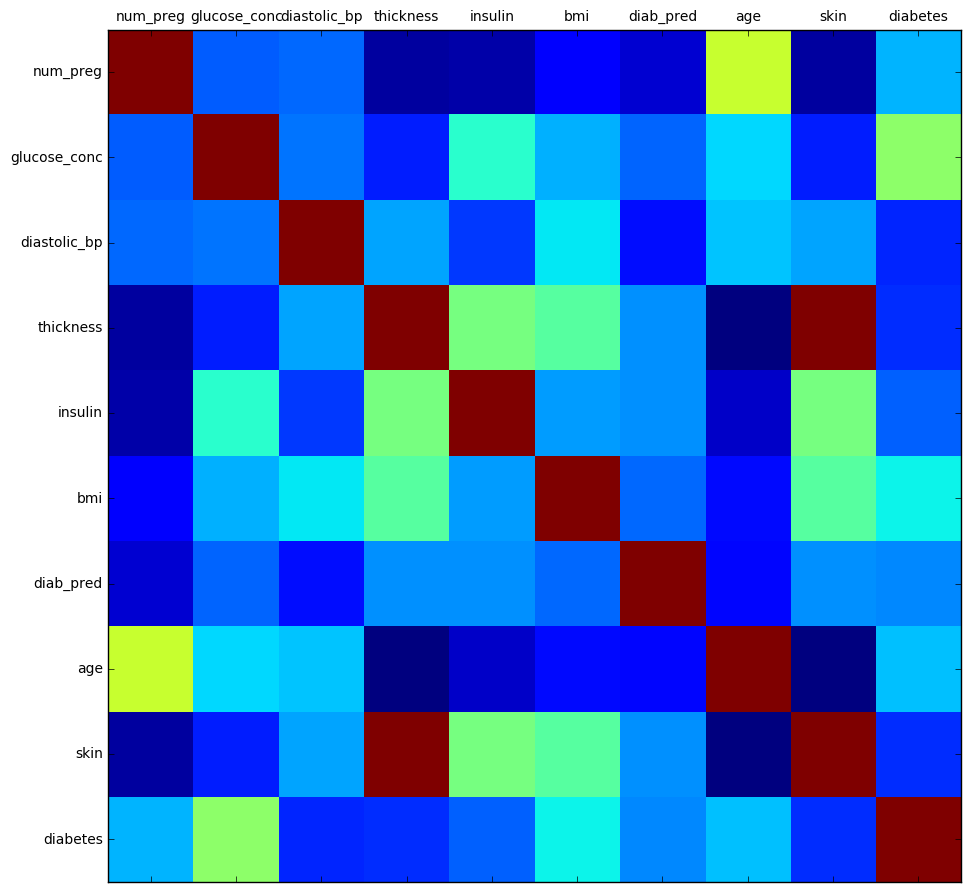

In [17]:
plot_corr(df)

In [19]:
df.corr()

num_preg  glucose_conc  diastolic_bp  thickness   insulin  \
num_preg      1.000000      0.129459      0.141282  -0.081672 -0.073535   
glucose_conc  0.129459      1.000000      0.152590   0.057328  0.331357   
diastolic_bp  0.141282      0.152590      1.000000   0.207371  0.088933   
thickness    -0.081672      0.057328      0.207371   1.000000  0.436783   
insulin      -0.073535      0.331357      0.088933   0.436783  1.000000   
bmi           0.017683      0.221071      0.281805   0.392573  0.197859   
diab_pred    -0.033523      0.137337      0.041265   0.183928  0.185071   
age           0.544341      0.263514      0.239528  -0.113970 -0.042163   
skin         -0.081672      0.057328      0.207371   1.000000  0.436783   
diabetes      0.221898      0.466581      0.065068   0.074752  0.130548   

                   bmi  diab_pred       age      skin  diabetes  
num_preg      0.017683  -0.033523  0.544341 -0.081672  0.221898  
glucose_conc  0.221071   0.137337  0.263514  0.057328  0.466581  
diastolic_bp  0.281805   0.041265  0.239528  0.207371  0.065068  
thickness     0.392573   0.183928 -0.113970  1.000000  0.074752  
insulin       0.197859   0.185071 -0.042163  0.436783  0.130548  
bmi           1.000000   0.140647  0.036242  0.392573  0.292695  
diab_pred     0.140647   1.000000  0.033561  0.183928  0.173844  
age           0.036242   0.033561  1.000000 -0.113970  0.238356  
skin          0.392573   0.183928 -0.113970  1.000000  0.074752  
diabetes      0.292695   0.173844  0.238356  0.074752  1.000000

In [20]:
df.head()

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin diabetes  
0   50  1.3790     True  
1   31  1.1426    False  
2   32  0.0000     True  
3   21  0.9062    False  
4   33  1.3790     True

In [21]:
del df['skin']

In [22]:
df.head()

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age diabetes  
0   50     True  
1   31    False  
2   32     True  
3   21    False  
4   33     True

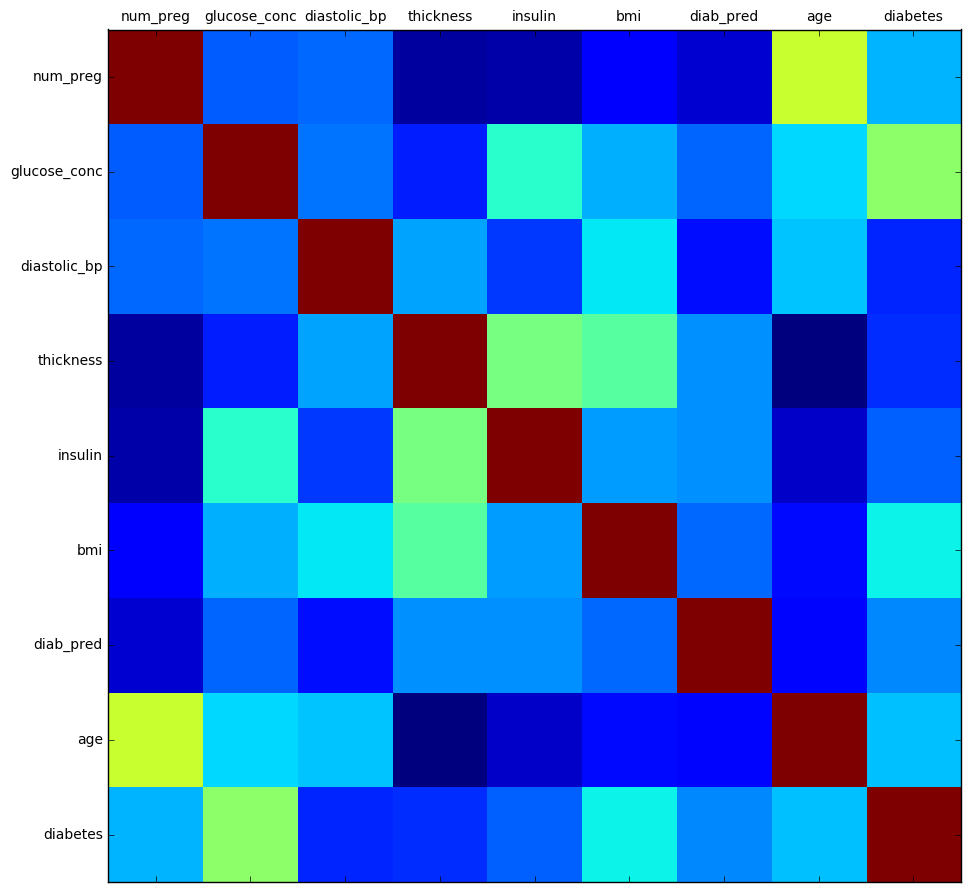

In [23]:
plot_corr(df)

## Check Data Types

In [25]:
df.head(5)

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age diabetes  
0   50     True  
1   31    False  
2   32     True  
3   21    False  
4   33     True

Change true to 1, false to 0

In [26]:
diabetes_map = {True: 1, False: 0}

In [29]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [30]:
df.head(5)

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age  diabetes  
0   50         1  
1   31         0  
2   32         1  
3   21         0  
4   33         1

Check true/false ratio

In [34]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true,  (num_true/ (num_true + num_false))* 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false))* 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


<h2>Splitting the data</h2>

70% for training, 30% for testing

In [40]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness',
                    'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column 1 X m
split_test_size = 0.30 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=split_test_size, random_state=42)
                                   # test_size = 0.3 is 30%,

In [41]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index))*100))

69.92% in training set
30.08% in test set


### verifying predicted value was split correctly

In [ ]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


### Pot-split Data Preparation

#### hidden missing values

In [43]:
df.head()

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age  diabetes  
0   50         1  
1   31         0  
2   32         1  
3   21         0  
4   33         1

Are these 0 value possible - how many rows have unexpected 0's

In [45]:
print("# rows in a dataframe {0}".format(len(df)))
print("# rows missing in glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing in diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing in thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing in insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing in bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing in diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing in age: {0}".format(len(df.loc[df['age'] == 0])))


# rows in a dataframe 768
# rows missing in glucose_conc: 5
# rows missing in diastolic_bp: 35
# rows missing in thickness: 227
# rows missing in insulin: 374
# rows missing in bmi: 11
# rows missing in diab_pred: 0
# rows missing in age: 0


### impute 0's with the mean

In [46]:
from sklearn.preprocessing import Imputer

#impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train with data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()